In [41]:
import pickle
import os
import copy
import numpy as np
import matplotlib

# Avoid type 3 fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


TASK_GOALS = [
  # (  z     x,    y)
    (0.5,  0.3, 0.15),
    (0.5, -0.3, 0.15),
    (0.5,  0.3,  0.3),
    (0.5, -0.3,  0.3),
    (0.7,  0.3, 0.15),
    (0.7, -0.3, 0.15),
    (0.7,  0.3,  0.3),
    (0.7, -0.3,  0.3),
]

GOAL_SEQUENCE = np.array([
    (0.6, 0.3, 0.15),
    (0.6, -0.3, 0.15),
    (0.6, 0., 0.3),
    (0.6, 0.3, 0.15),
])


start_pos = np.array([0.62, 0.17, 0.])

folder = "../figs/rollouts_search_push"

samples = [
    {
        "samples": pickle.load(open(os.path.join(folder, "down_left.pkl"), "rb")),
        "goal": start_pos + np.array([-0.2, 0.1, 0.])
    },
    {
        "samples": pickle.load(open(os.path.join(folder, "down_right.pkl"), "rb")),
        "goal": start_pos + np.array([-0.2, -0.1, 0.])
    },
    {
        "samples": pickle.load(open(os.path.join(folder, "up_left.pkl"), "rb")),
        "goal": start_pos + np.array([0.2, 0.1, 0.])
    },
    {
        "samples": pickle.load(open(os.path.join(folder, "up_right.pkl"), "rb")),
        "goal": start_pos + np.array([0.2, -0.1, 0.])
    }
]

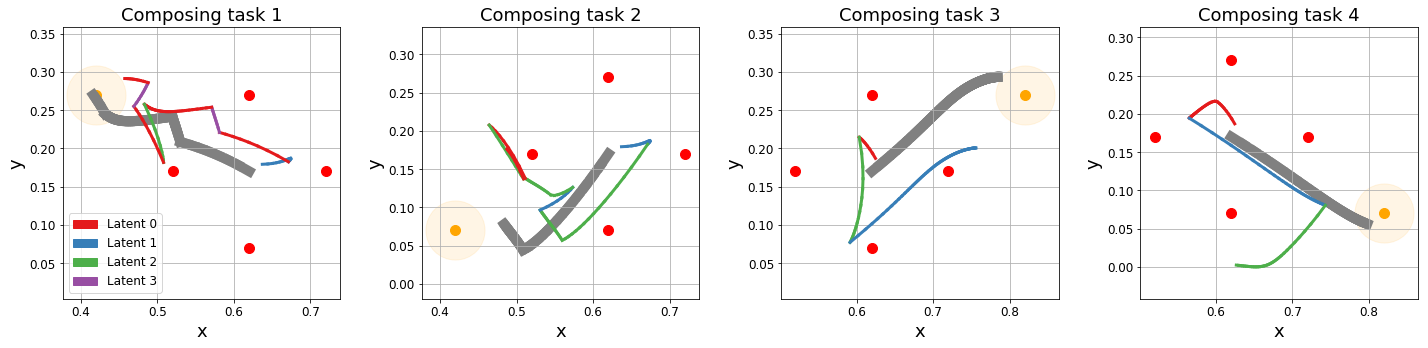

In [57]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import numpy as np

matplotlib.rcParams.update({'font.size': 12})
colormap = lambda x: matplotlib.cm.get_cmap("Set1")(x)

nrollouts = 1
ntasks = 8

X_AXIS = 0
Y_AXIS = 1
axes = ["x", "y", "z"]

d = 0.1
TASK_GOALS = np.array([
    [0.62+d, 0.17, 0],
    [0.62-d, 0.17, 0],
    [0.62, 0.17+d, 0],
    [0.62, 0.17-d, 0],
])

offset = np.array([-0.02, -0.05, 0])
gripper_offset = np.array([-0.02, -0.05, 0])

legend_handles = []
available_latents = set()
for i in range(len(samples)):
    for t in range(ntasks):
        for t in samples[i]["samples"][0]["latent_indices"]:
            available_latents.add(t)
for t in available_latents:
    legend_handles.append(mpatches.Patch(color=colormap(t * 1. / ntasks), label='Latent %i' % t))

fig, axs = plt.subplots(nrows=1, ncols=len(samples), figsize=(len(samples)*5, 5))
for sid, d in enumerate(samples):
    ax = axs[sid]
    if sid == 0:
        ax.legend(handles=legend_handles)
    ax.set_title("Composing task %i" % (sid+1), fontsize=18)
    ax.set_xlabel(axes[X_AXIS], fontsize=18)
    ax.set_ylabel(axes[Y_AXIS], fontsize=18)
    ax.axis("equal")
    ax.grid()

    # plt.scatter(GOAL_SEQUENCE[:-1, X_AXIS], GOAL_SEQUENCE[:-1, Y_AXIS], s=2500, c="black", alpha=.1)
    # plt.scatter(GOAL_SEQUENCE[:-1, X_AXIS], GOAL_SEQUENCE[:-1, Y_AXIS], s=100, c="black")
    ax.scatter(TASK_GOALS[:, X_AXIS], TASK_GOALS[:, Y_AXIS], s=100, c="red")
    ax.scatter([d["goal"][X_AXIS]], [d["goal"][Y_AXIS]], s=3500, c="orange", alpha=.1, zorder=0)
    ax.scatter([d["goal"][X_AXIS]], [d["goal"][Y_AXIS]], s=100, c="orange", label="Goal")

    rollouts = d["samples"]
    for i in range(1):#nrollouts):
        gripper_pos = np.array([s["episode"]["gripper_position"] for s in rollouts[i]["infos"]])
        object_pos = np.array([s["episode"]["object_position"] for s in rollouts[i]["infos"]])
        tasks = rollouts[i]["latent_indices"]

        object_pos += offset
        gripper_pos += gripper_offset

        xs, ys = gripper_pos[:,X_AXIS], gripper_pos[:,Y_AXIS]
        oxs, oys = object_pos[:,X_AXIS], object_pos[:,Y_AXIS]
        for u in range(1, len(gripper_pos)):
            a, b = u-1, u+1
            ax.plot(oxs[a:b], oys[a:b], color="gray", linewidth=10, zorder=1)
            ax.plot(xs[a:b], ys[a:b], color=colormap(tasks[u] * 1. / ntasks), linewidth=3, zorder=2)

fig.tight_layout()
fig.savefig("compose_push_sequence.png")
fig.savefig("compose_push_diagonal.pdf")